In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [272]:
df = pd.read_csv("/Users/dikshagulati/Desktop/Data/train_2v.csv") #loading csv file to read the data
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# Visualization of Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d4c3b50>,
      dtype=object)

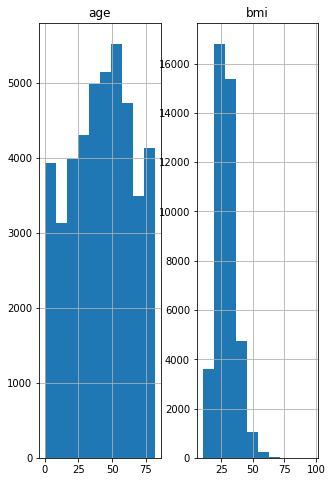

In [273]:
df[['age','bmi']].hist(figsize=(5,8)) #evaluating age and bmi distribution

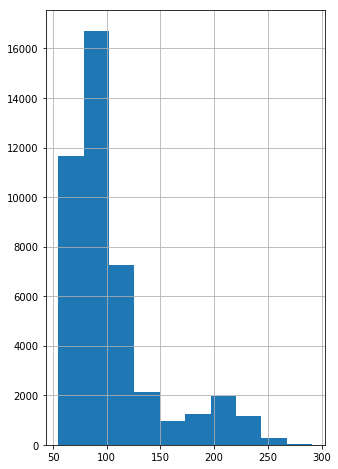

In [274]:
df['avg_glucose_level'].hist(figsize=(5,8)) #evaluating glucose leve distribution

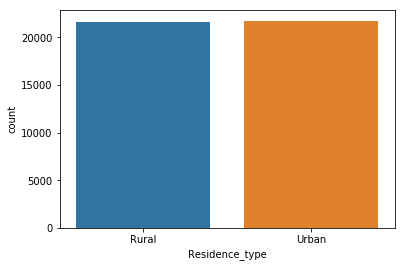

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Residence_type', data=df)

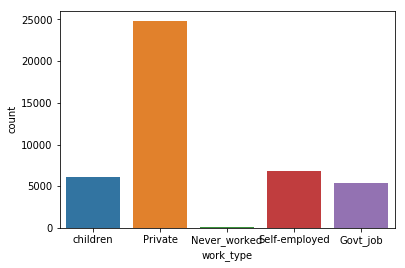

In [276]:
sns.countplot(x='work_type', data=df)

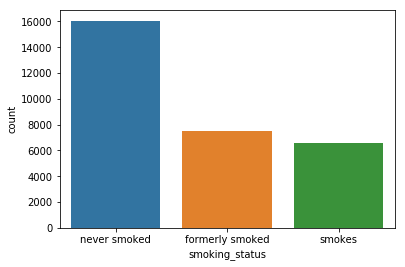

In [277]:
sns.countplot(x='smoking_status', data=df)

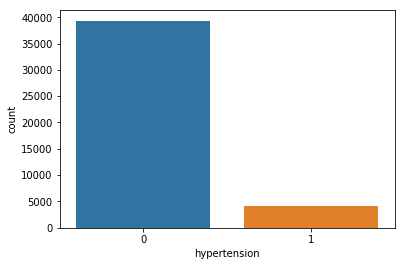

In [278]:
sns.countplot(x='hypertension', data=df)

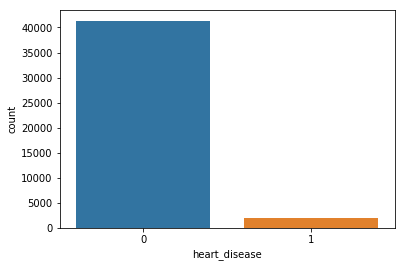

In [279]:
sns.countplot(x='heart_disease', data=df)

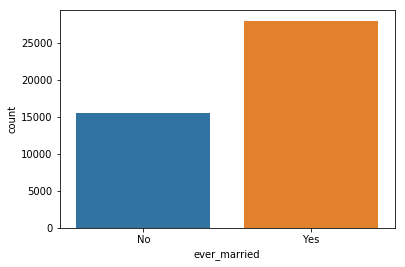

In [280]:
sns.countplot(x='ever_married', data=df)

In [281]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# Data Preprocessing

In [282]:
# Replace NULL values using median
median = df['bmi'].median()
df['bmi'].fillna(median, inplace=True)

In [283]:
# Change string to numerical values
ever_married_map = {'Yes' : 1, 'No' : 0}
df['ever_married'] = df['ever_married'].map(ever_married_map)

In [284]:
# Change string to numerical values
smoking_map = {'never smoked' : 0, 'formerly smoked' : 1, 'smokes' : 2}
df['smoking_status'] = df['smoking_status'].map(smoking_map)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,0,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,1,Private,Urban,87.96,39.2,0.0,0
2,16523,Female,8.0,0,0,0,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,1,Private,Rural,69.04,35.9,1.0,0
4,46136,Male,14.0,0,0,0,Never_worked,Rural,161.28,19.1,NaN,0


In [285]:
# Change string to numerical values
gender_map = {'Male' : 0, 'Female' : 1}
df['gender'] = df['gender'].map(gender_map)

In [286]:
# Change string to numerical values
df = pd.concat([df,pd.get_dummies(df['Residence_type'], prefix = 'residence')], axis=1)
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,residence_Rural,residence_Urban
0,30669,0,3.0,0,0,0,children,Rural,95.12,18.0,NaN,0,1,0
1,30468,0,58.0,1,0,1,Private,Urban,87.96,39.2,0.0,0,0,1
2,16523,1,8.0,0,0,0,Private,Urban,110.89,17.6,NaN,0,0,1


In [287]:
# Change string to numerical values
df = pd.concat([df,pd.get_dummies(df['work_type'], prefix = 'work')], axis=1)

In [288]:
# Remove redundant columns
del df['id']
del df['Residence_type']
del df['work_type']

In [289]:
# Drop any rows with null value
df= df.dropna()

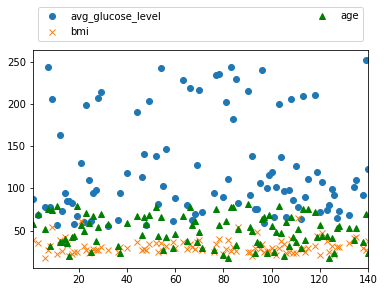

In [290]:
dataset_plot = df
dataset_plot[['avg_glucose_level','bmi','age']].head(100).plot(style=['o','x','g^'])
plt.legend(bbox_to_anchor=(0.,1.02,1., .102), loc=3,ncol=2, mode="expand")

In [291]:
from sklearn.preprocessing import StandardScaler

In [292]:
scaler = StandardScaler()

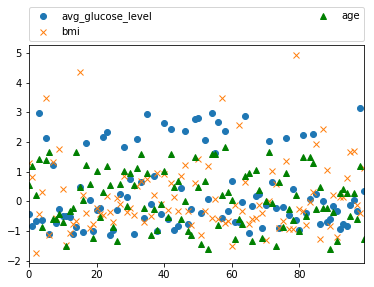

In [293]:
stroke = scaler.fit_transform(df[['avg_glucose_level','bmi','age']])
storkeDataFrame = pd.DataFrame(stroke)
storkeDataFrame.columns = ['avg_glucose_level','bmi','age']
storkeDataFrame.head(100).plot(style=['o','x','g^'])
plt.legend(bbox_to_anchor=(0.,1.02,1., 10.), loc=3,ncol=2, mode="expand", borderaxespad=0.)

# Implementing Machine Learning Models

## Logistic Regression

In [294]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [295]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [296]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [297]:
log_model.score(X_train,y_train)

0.9778347334947078

In [298]:
log_model.score(X_test,y_test)

0.981063122923588

In [299]:
#Checking accuracy through confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
y_predicted=log_model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted) 

In [300]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8859
           1       0.00      0.00      0.00       171

   micro avg       0.98      0.98      0.98      9030
   macro avg       0.49      0.50      0.50      9030
weighted avg       0.96      0.98      0.97      9030



[[8859    0]
 [ 171    0]]


Text(69,0.5,'Truth')

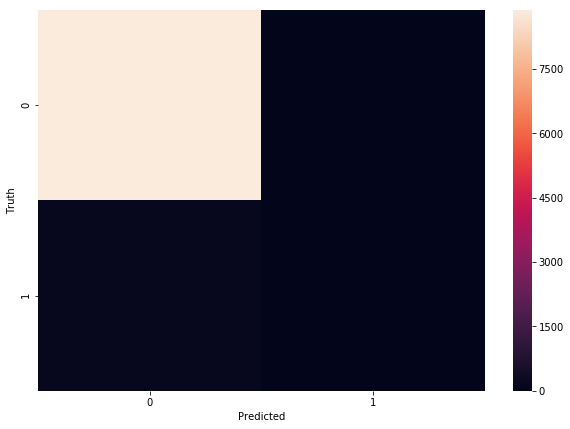

In [301]:
#plotting confusion matrix
import seaborn as sn 
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [302]:
def plot_roc_curve(fpr, tpr, algoname):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - ' + algoname)
    plt.legend()
    plt.show()

AUC: 0.84


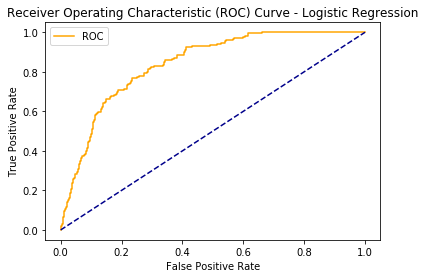

In [303]:
probs = log_model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr, 'Logistic Regression')

## Decision Tree Classifier

In [304]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [305]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [306]:
dc.score(X_train, y_train)

1.0

In [307]:
dc.score(X_test, y_test)

0.9586932447397564

In [308]:
y_predicted=dc.predict(X_test)
cm=confusion_matrix(y_test,y_predicted) 

In [309]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8859
           1       0.06      0.08      0.07       171

   micro avg       0.96      0.96      0.96      9030
   macro avg       0.52      0.53      0.52      9030
weighted avg       0.96      0.96      0.96      9030



[[8643  216]
 [ 157   14]]


Text(69,0.5,'Truth')

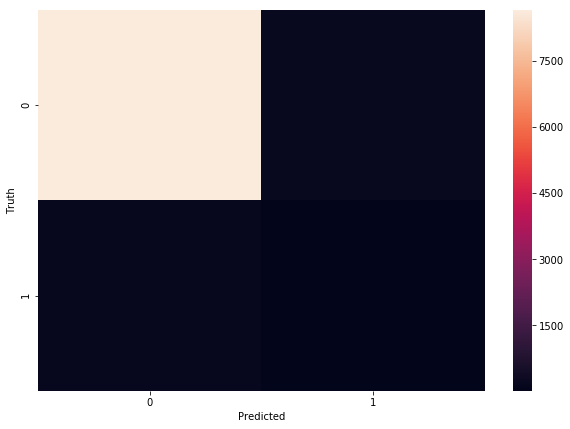

In [310]:
#plotting classification report
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Truth')

AUC: 0.53


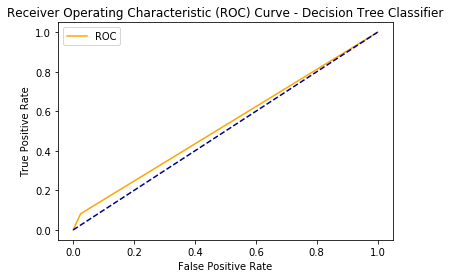

In [311]:
probs = dc.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr, 'Decision Tree Classifier')

## Random Forest Classifer

In [312]:
#Using Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [313]:
random_forest = RandomForestClassifier(n_estimators=10) # at 60 and 68 we are getting slightly less percent of random_forest.score(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [314]:
test1 = random_forest.predict(X_test) 

In [315]:
random_forest.score(X_test, y_test)

0.9807308970099667

In [316]:
random_forest.score(X_train, y_train) 

0.9944942806967583

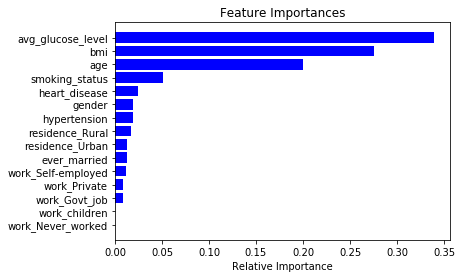

In [317]:
#feature importance
importances = random_forest.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),['work_Never_worked', 'work_children', 'work_Govt_job','work_Private','work_Self-employed','ever_married','residence_Urban','residence_Rural','hypertension','gender','heart_disease','smoking_status','age','bmi','avg_glucose_level'])
plt.xlabel('Relative Importance')
plt.show()

In [318]:
#checking accuracy through confusion matrix
y_predicted=random_forest.predict(X_test)
cm=confusion_matrix(y_test,y_predicted) 

In [319]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8859
           1       0.00      0.00      0.00       171

   micro avg       0.98      0.98      0.98      9030
   macro avg       0.49      0.50      0.50      9030
weighted avg       0.96      0.98      0.97      9030



[[8856    3]
 [ 171    0]]


Text(69,0.5,'Truth')

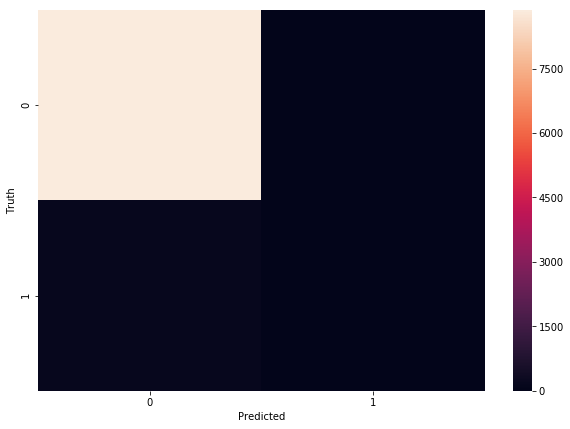

In [320]:
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Truth')

AUC: 0.64


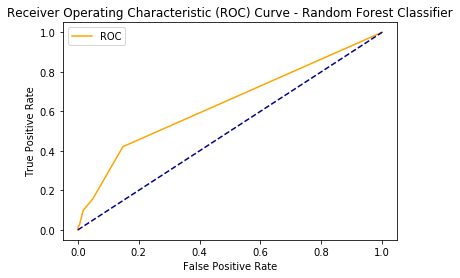

In [321]:
probs = random_forest.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr, 'Random Forest Classifier')